In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [241]:
real_space = np.linspace(-1.5, 1.5, 500)
comp_space = np.linspace(-1.5, 1.5, 500)

In [242]:
def Julia(real_space, comp_space, C=complex(-0.1,0.65), n=100):
    colors = []
    for j in comp_space:
        for i in real_space:
            z = complex(i,j)
            zs = []
            for k in range(n):
                z = z*z + C
                zs.append(z)
                if abs(z) > 10:
                    break
            period = ((np.abs(zs[-1].real - np.real(zs)[::-1])<1e-2)*(np.abs(zs[-1].imag - np.imag(zs)[::-1])<1e-2)).astype(int)[1:]
            if np.sum(period) == 0:
                color = 255
            elif np.sum(period) != 0:
                color = np.min(np.nonzero(period)) * 255 / n
            colors.append(color)
    return np.array(colors).reshape(real_space.shape[0], -1)

In [243]:
colors = Julia(real_space, comp_space)

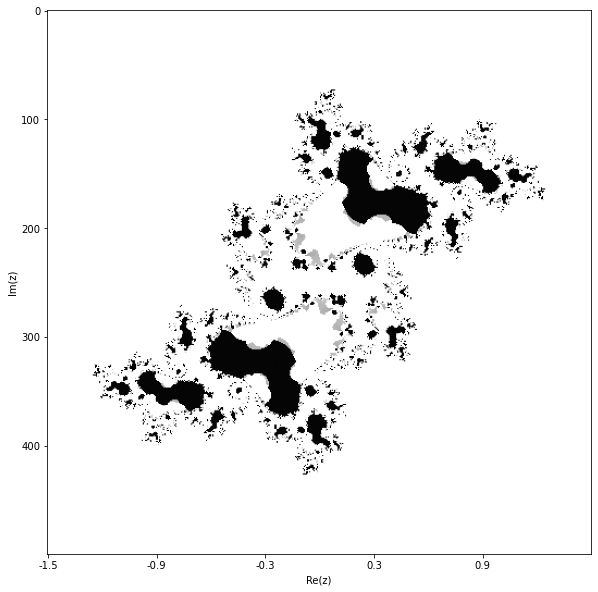

In [244]:
plt.figure(figsize=(10,10))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
plt.imshow(colors.reshape(500,-1), cmap=plt.cm.gray)

In [245]:
golden_ratio = (1 + np.sqrt(5))/2
colors = Julia(real_space, comp_space, C=1-golden_ratio)

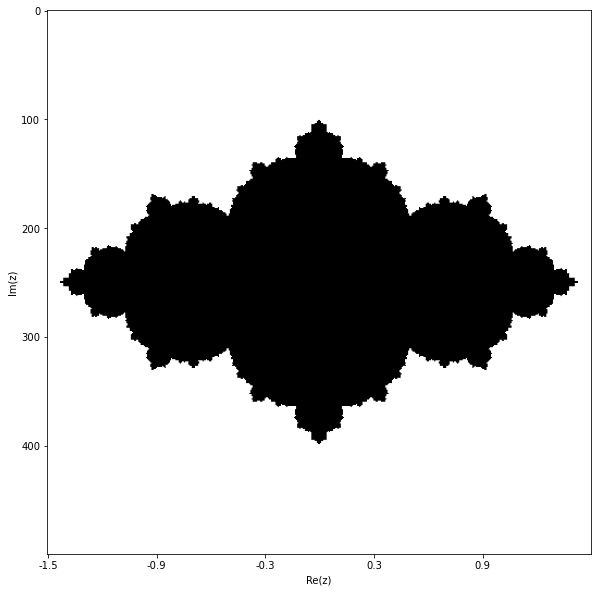

In [246]:
plt.figure(figsize=(10,10))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
plt.imshow(colors.reshape(500,-1), cmap=plt.cm.gray)

0.45
0.451010101010101
0.45202020202020204
0.45303030303030306
0.4540404040404041
0.45505050505050504
0.45606060606060606
0.45707070707070707
0.4580808080808081
0.4590909090909091
0.4601010101010101
0.46111111111111114
0.46212121212121215
0.46313131313131317
0.46414141414141413
0.46515151515151515
0.46616161616161617
0.4671717171717172
0.4681818181818182
0.4691919191919192
0.47020202020202023
0.47121212121212125
0.47222222222222227
0.4732323232323232
0.47424242424242424
0.47525252525252526
0.4762626262626263
0.4772727272727273
0.4782828282828283
0.4792929292929293
0.48030303030303034
0.48131313131313136
0.4823232323232324
0.48333333333333334
0.48434343434343435
0.48535353535353537
0.4863636363636364
0.4873737373737374
0.4883838383838384
0.48939393939393944
0.49040404040404045
0.4914141414141414
0.49242424242424243
0.49343434343434345
0.49444444444444446
0.4954545454545455
0.4964646464646465
0.4974747474747475
0.49848484848484853
0.49949494949494955
0.5005050505050506
0.5015151515151516

MovieWriter imagemagick unavailable; using Pillow instead.


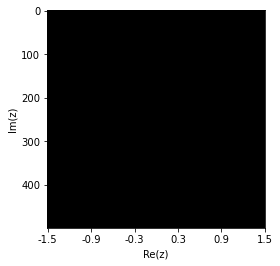

In [247]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
 
n = 100
real_space = np.linspace(-1.5, 1.5, 500)
comp_space = np.linspace(-1.5, 1.5, 500)

fig = plt.figure()
camera = Camera(fig)
for a in np.linspace(0.45, 0.55, n):
    print(a)
    julia = Julia(real_space, comp_space, C=np.exp(2*np.pi*complex(0,1)*a))
    plt.imshow(julia, cmap=plt.cm.copper)
    plt.xticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    camera.snap()

animation = camera.animate()
animation.save(f'julia.gif', writer = 'imagemagick')